**Проект "Модели прогноза оттока кдиентов фитнес-центров «Культурист-датасаентист»**

**Введение**

Наш сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Одноим из важнейших бизнес-показателей является коэффициент удержания клиентов, а одной из его составляющих количество клиентов попавших в отток. И это распространённая проблема фитнес-клубов и других сервисов. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

**Наша задача — провести анализ, выявить лучшую модель прогнозирования оттока клиентов и подготовит план действий для улучшения показателей.**

Данные для анализа представленны оцифрованными анкетами пользователей, а также данные посещения фитнесс-клубов. Данные представленны на месяц до оттока и факт оттока на определённый месяц.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Загрузка-данных" data-toc-modified-id="1.-Загрузка-данных-1">1. Загрузка данных</a></span></li><li><span><a href="#2.-Исследовательский-аналих-данных" data-toc-modified-id="2.-Исследовательский-аналих-данных-2">2. Исследовательский аналих данных</a></span><ul class="toc-item"><li><span><a href="#2.1.-Анализ-средних-значений-и-стандартного-отклонения." data-toc-modified-id="2.1.-Анализ-средних-значений-и-стандартного-отклонения.-2.1">2.1. Анализ средних значений и стандартного отклонения.</a></span></li><li><span><a href="#2.2.-Построение-гистограмм-рассеяния-по-признакам" data-toc-modified-id="2.2.-Построение-гистограмм-рассеяния-по-признакам-2.2">2.2. Построение гистограмм рассеяния по признакам</a></span></li><li><span><a href="#2.3.-Построение-матрицы-корреляции-и-тепловой-карты" data-toc-modified-id="2.3.-Построение-матрицы-корреляции-и-тепловой-карты-2.3">2.3. Построение матрицы корреляции и тепловой карты</a></span></li></ul></li><li><span><a href="#3.-Построение-моделей-прогнозирования-оттока-клиентов" data-toc-modified-id="3.-Построение-моделей-прогнозирования-оттока-клиентов-3">3. Построение моделей прогнозирования оттока клиентов</a></span></li><li><span><a href="#4.-Кластеризация-клиентов" data-toc-modified-id="4.-Кластеризация-клиентов-4">4. Кластеризация клиентов</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5">Выводы</a></span></li></ul></div>

# 1. Загрузка данных

Импортируем необходимые для анализа библиотеки.

In [1]:
import pandas as pd
import numpy as np
from numpy import median
from scipy import stats as st
import math as mth
import datetime as dt
from datetime import datetime, timedelta
#import plotly.express as px 
#from plotly import graph_objects as go
#import re

import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')
register_matplotlib_converters()

pd.options.display.max_colwidth = 600

Откроем предоставленные данные 'gym_churn.csv'.

In [2]:
try:
    df = pd.read_csv('gym_churn.csv')
except:
    df = pd.read_csv('/datasets/gym_churn.csv')
    
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Посмотрим на объем данных.

In [3]:
print('Объем данных:', df.shape)

Объем данных: (4000, 14)


Данные представленные в 14 столбцах и 4000 строках. Достаточный объем для дальнейшего анализа.

Посмотрим на заполненность и тип данных.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

На первый взгляд данные полные. Тип данных представлен тольок числовыми значениями, что логично, учитывая проделанную отделом по работе с клиентами работу по оцифровке данных пользователей.

Проверим данные на пропуски в значениях.

In [5]:
df.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Пропуски отсутствуют!

Теперь проверим на наличие дубликатов.

In [6]:
df.duplicated().sum()

0

Дубликаты отсутствуют!

# 2. Исследовательский аналих данных

## 2.1. Анализ средних значений и стандартного отклонения.

Для начала взгдянем на средние значения и стандартные отклонения по всему датафрейму. Для этого воспользуемся методом `'descibe'`.  

In [7]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Мы видим, что по ряду показателей - пол, представитель компании-партнера, посещение групповых занятий, данные разделились практически поровну. А по показателям - близкое проживание, указанные номер телефона, акция "приведи друга", есть перекос в одну определенную сторону. Также можно добавить, что средний возраст клиентов около 29 лет с небольшим разбросом.

Обобщая данные мы получим портрет среднестатистического клиента:

- равное представительство по половому признаку;

- близкое проживание либо место работы к фитнесс-клубу;

- равное количество "свободных" клиентов и клиентов компаний-партнеров;

- указывают контактный телефон при заполнении анкеты;

- срок абонемента около 4,5 месяцев;

- время от времени посещают групповые занятия;

- средний возраст около 29 лет;

- являются клиентами фитнесс-клуба около 4 мес;

- не очень охотно пользуются дополнительными услугами фитнесс-клуба;

- средняя частота посещения нчуть меньше 2 раз в неделю.

Теперь взглянем на средние значения признаков в двух группах - тех, кто ушел в отток и тех, кто остался. Для этого сгруппируем данные и вясчитаем средние значения. 0 - те кто остался, 1 - ушедшие в отток.

In [8]:
df_grp = df.groupby(['Churn']).mean()
df_grp

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


По полученным данным можем сказать, что те кто ушел в отток в меньшей степени являются представителями компаний-партнеров и участниками акции "приведи друга", меньше посещали групповые занятия, **с более коротким сроком окончания контракта, намного меньшим временем посещения фитнесс-клубов**, **с меньшим сроком действия контракта и меньшим средним количеством посещений за месяц.** 

## 2.2. Построение гистограмм рассеяния по признакам

Построим гистограммы распределения признаков по двум группам - те, кто остался, и те, кто ушел в отток. При построим графиков отбросим столбец `'Churn'`. 

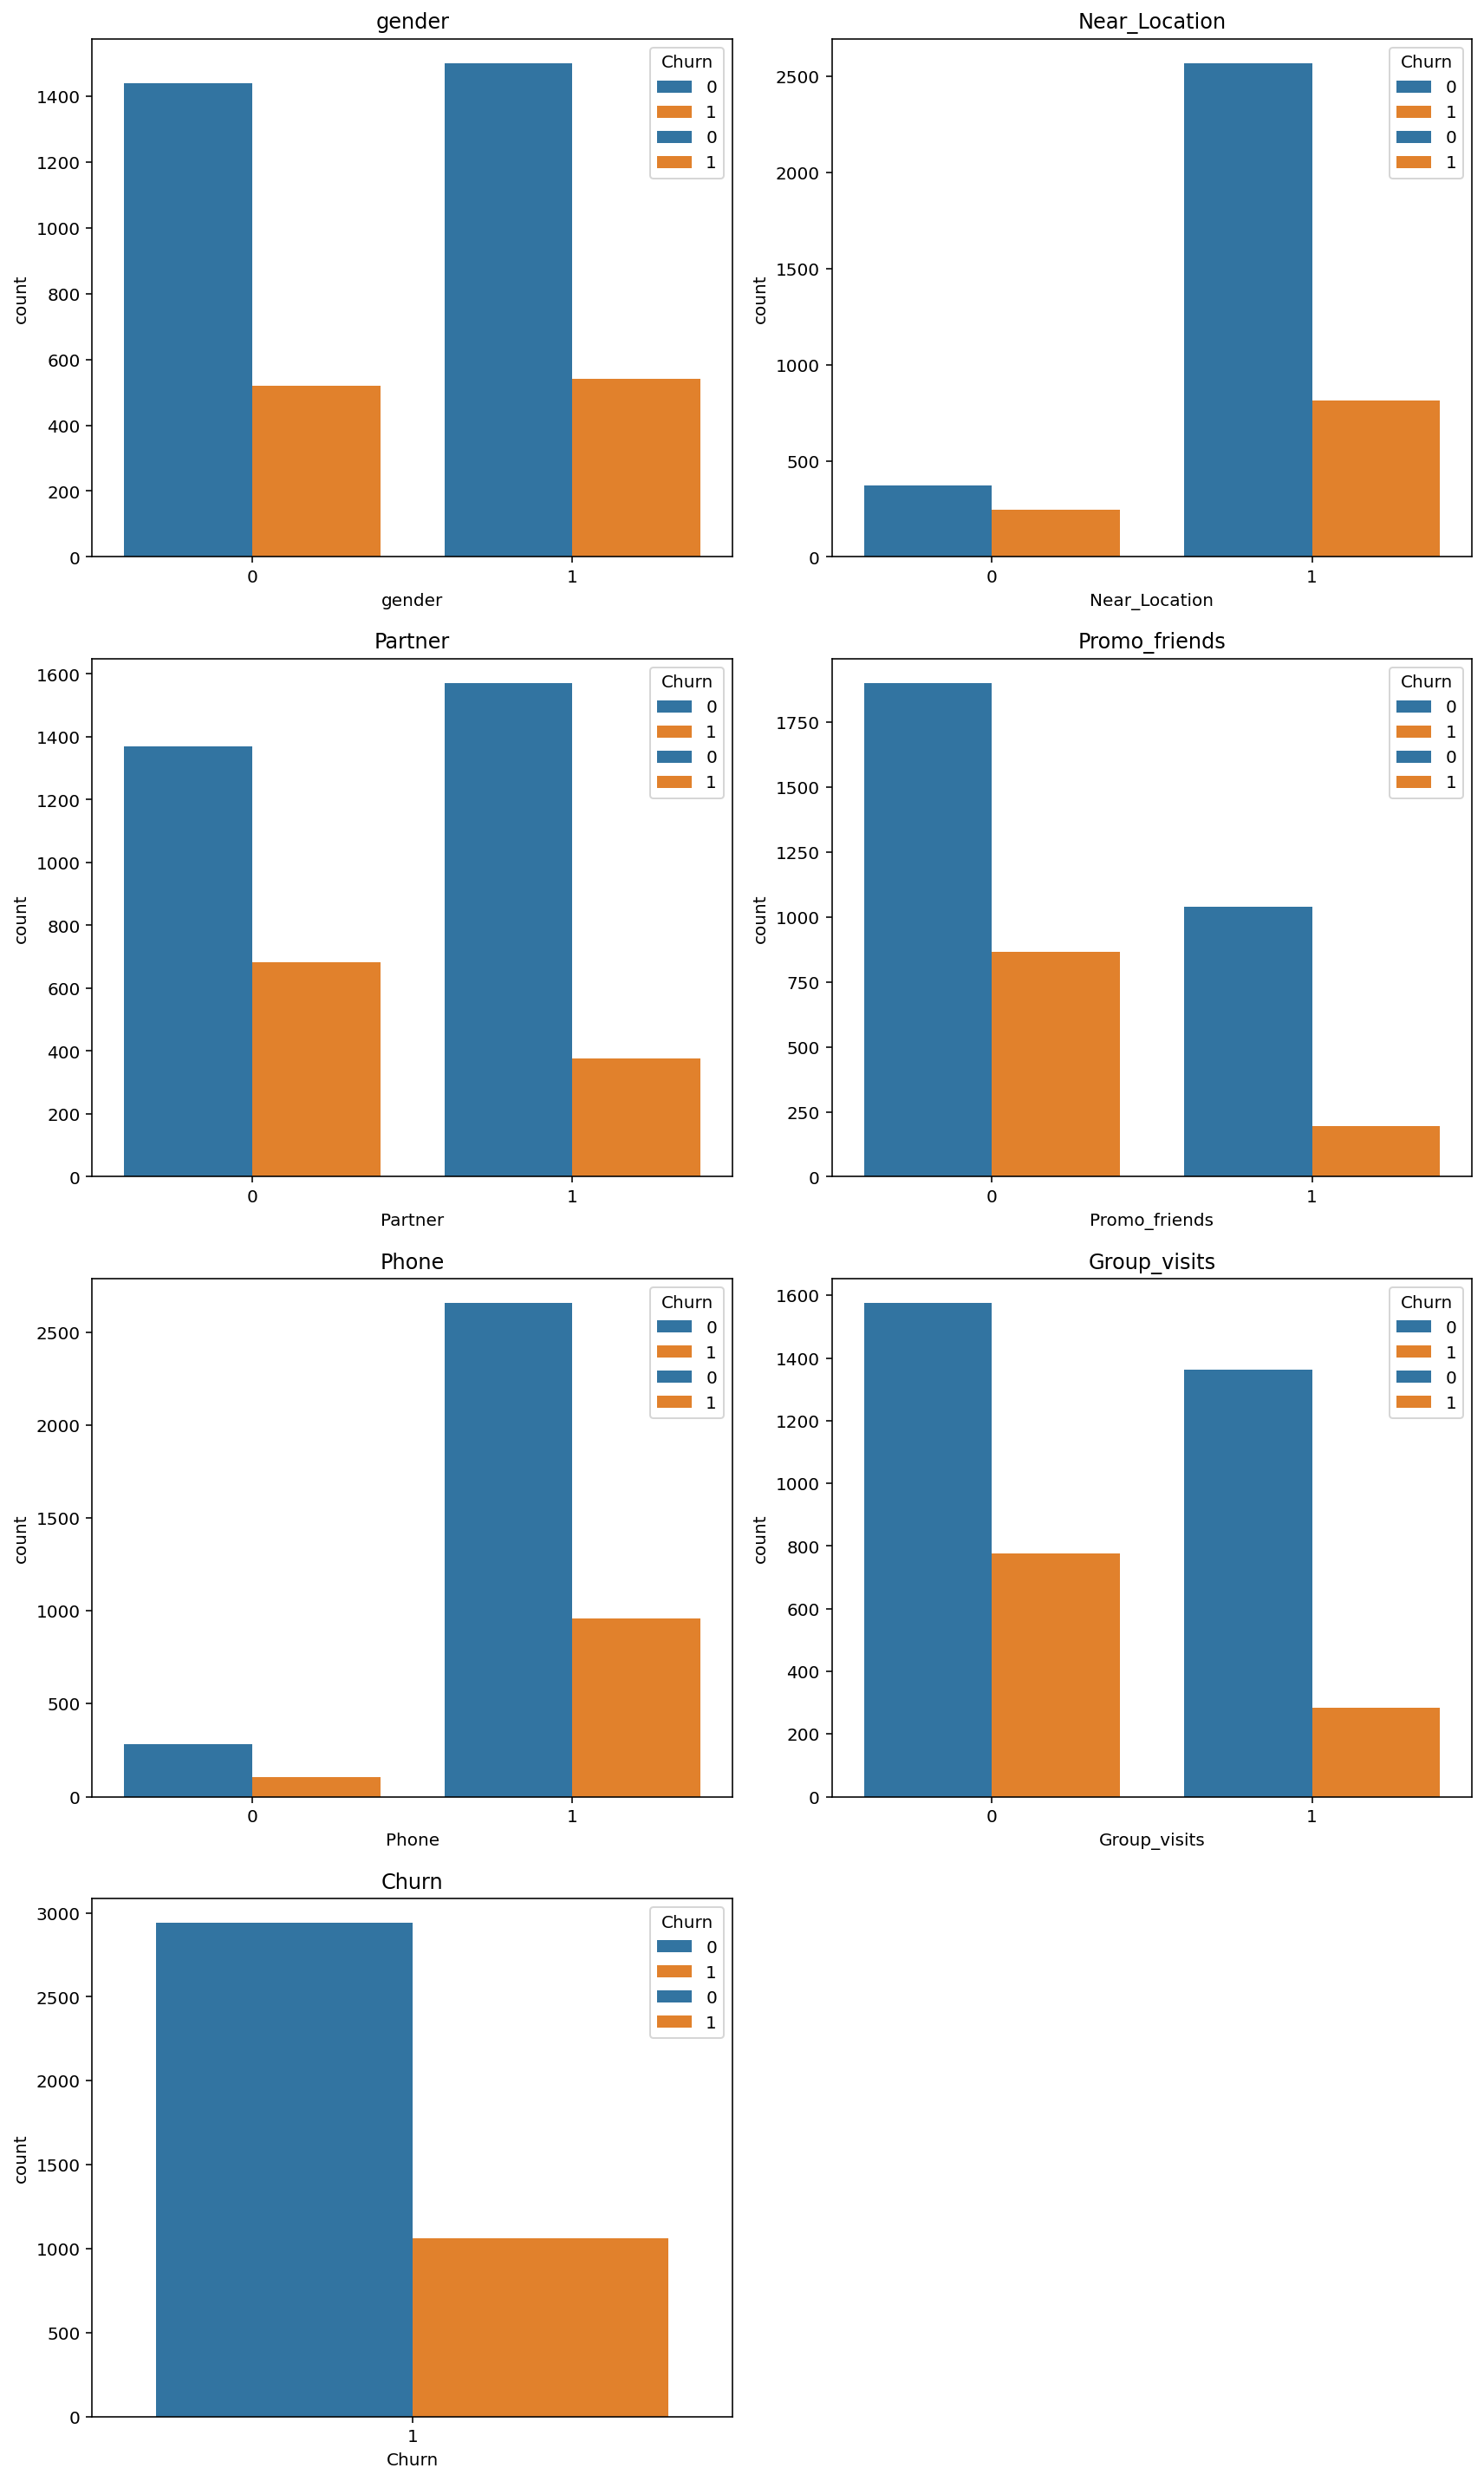

In [9]:
params = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Churn']
col_count, row_count = 2, 4

plt.figure(figsize=(12, 20))

for i, param in enumerate(params):
    for churn in df['Churn'].unique():
        current = df.query('Churn == @churn')
        sns.countplot(current[param], hue=df['Churn'],
                    ax = plt.subplot(row_count, col_count, i + 1))
    plt.title(param)
plt.tight_layout()    
plt.show()

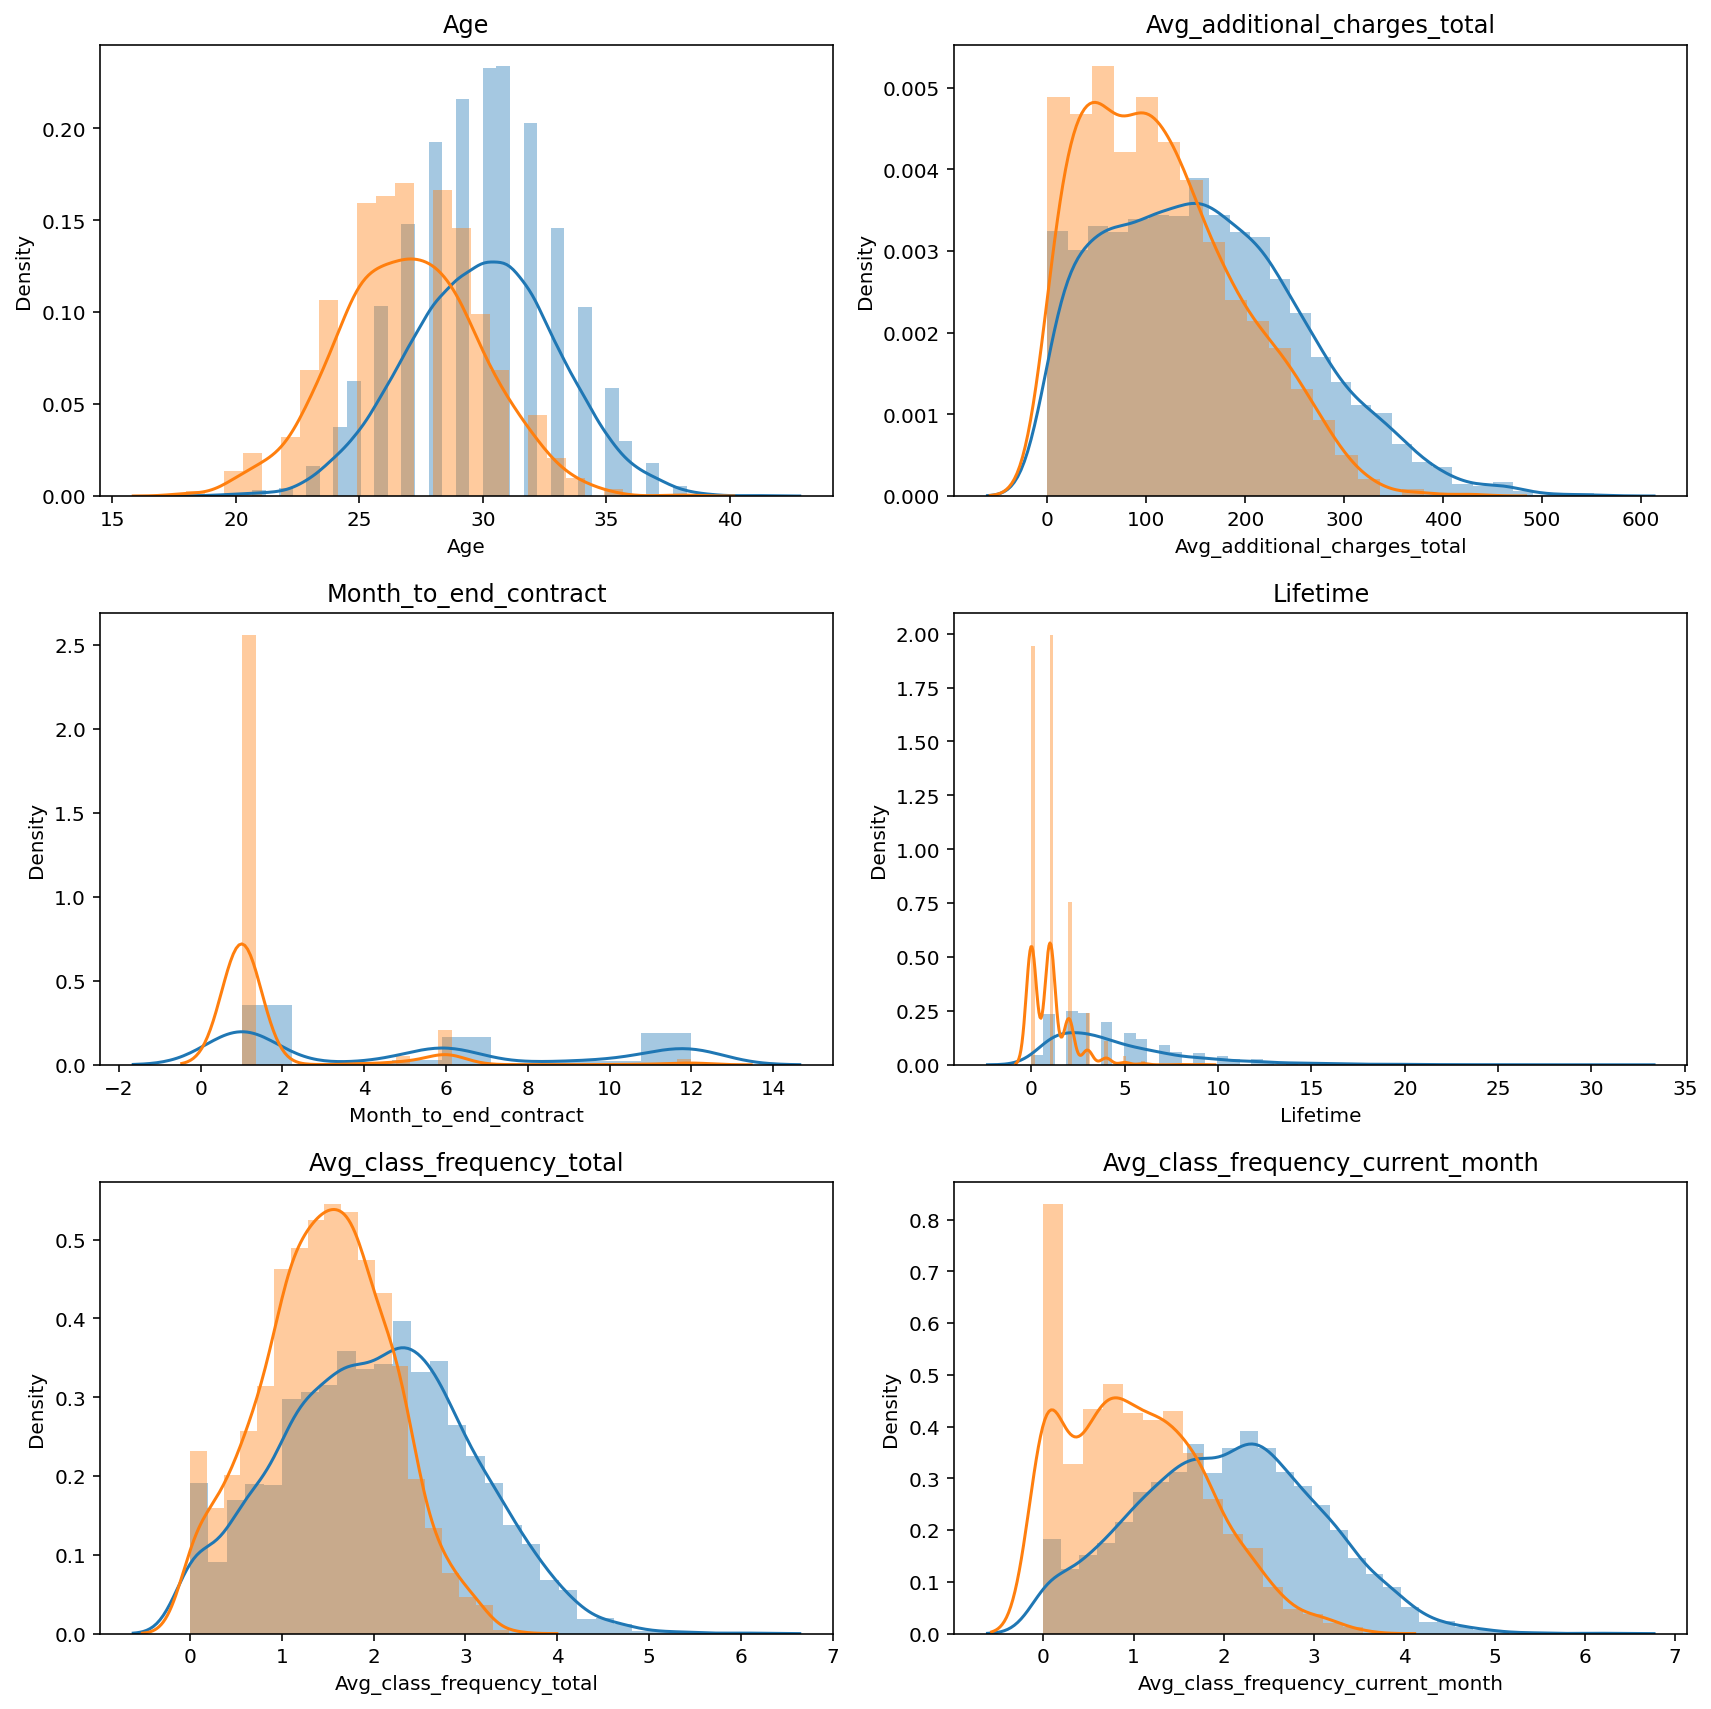

In [10]:
params = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract',\
          'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
col_count, row_count = 2, 3

plt.figure(figsize=(12, 12))

for i, param in enumerate(params):
    for churn in df['Churn'].unique():
        current = df.query('Churn == @churn')
        sns.distplot(current[param], kde=True, 
                    ax = plt.subplot(row_count, col_count, i + 1))
    plt.title(param)
plt.tight_layout()    
plt.show()

На графиках мы видим наглядное подтверждение сделанных ранее выводов - те кто ушел в отток в меньшей степени являются представителями компаний-партнеров и участниками акции "приведи друга", меньше посещали групповые занятия, **с более коротким сроком окончания контракта, намного меньшим временем посещения фитнесс-клубов**, **с меньшим сроком действия контракта и меньшим средним количеством посещений за месяц.**

Также мы видим, что по показателю `'Lifitime'` есть большой звост выбросов - клиентов с очень большим сроком посешения. Этими данными можем пожертвовать.

Построим отдельный график, чтобы оценить выбросы.

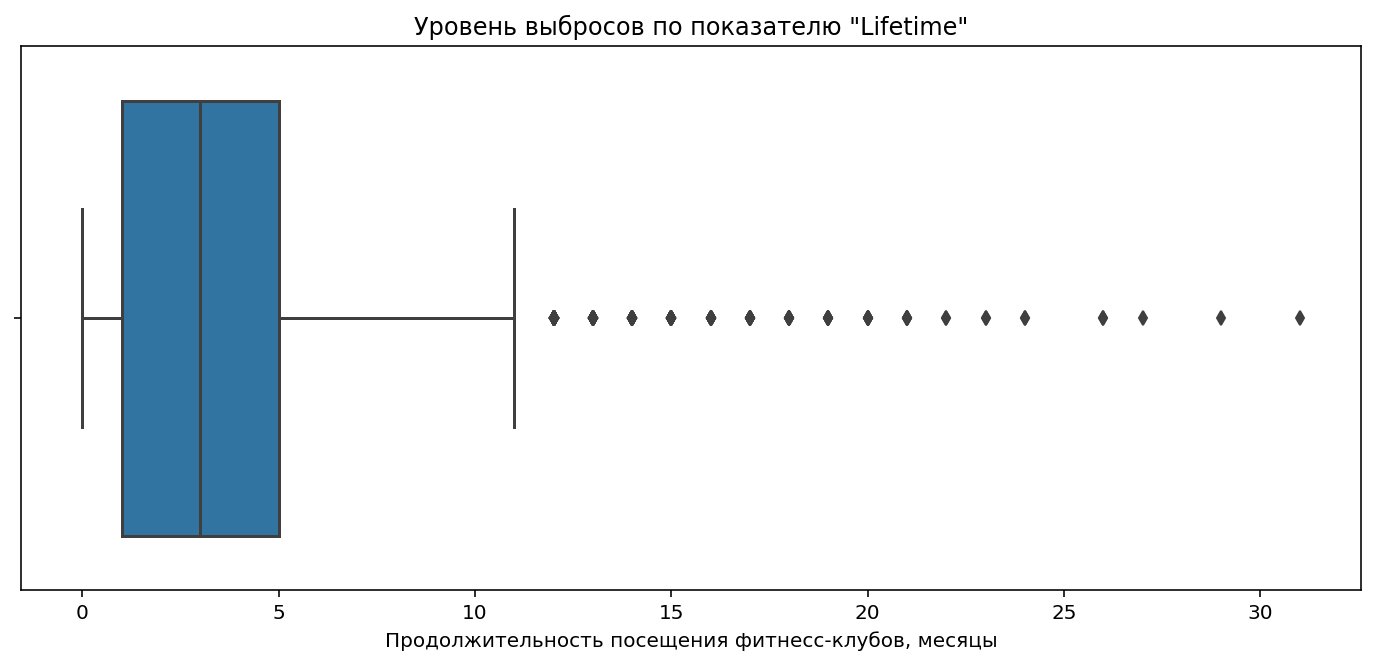

In [11]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Lifetime'], hue='Churn', data=df)
plt.title('Уровень выбросов по показателю "Lifetime"')
plt.xlabel('Продолжительность посещения фитнесс-клубов, месяцы')
plt.show()

Можно принять, что продолжительность более 12 месяцев является выбросами.


In [12]:
df_1 = df.query('Lifetime <= 12')

In [13]:
print('Соотношение пользователей до удаления выбросов:')
print(df['Churn'].value_counts())
print('Соотношение пользователей после удаления выбросов:')
print(df_1['Churn'].value_counts())

Соотношение пользователей до удаления выбросов:
0    2939
1    1061
Name: Churn, dtype: int64
Соотношение пользователей после удаления выбросов:
0    2800
1    1061
Name: Churn, dtype: int64


Нам пришлось отбросить всего 139 пользователя из числа тех, кто остался: это чуть менее 5%.

Построим заново гистограммы рассения по признакам, чтобы оценить влияние после удаления выбросов.

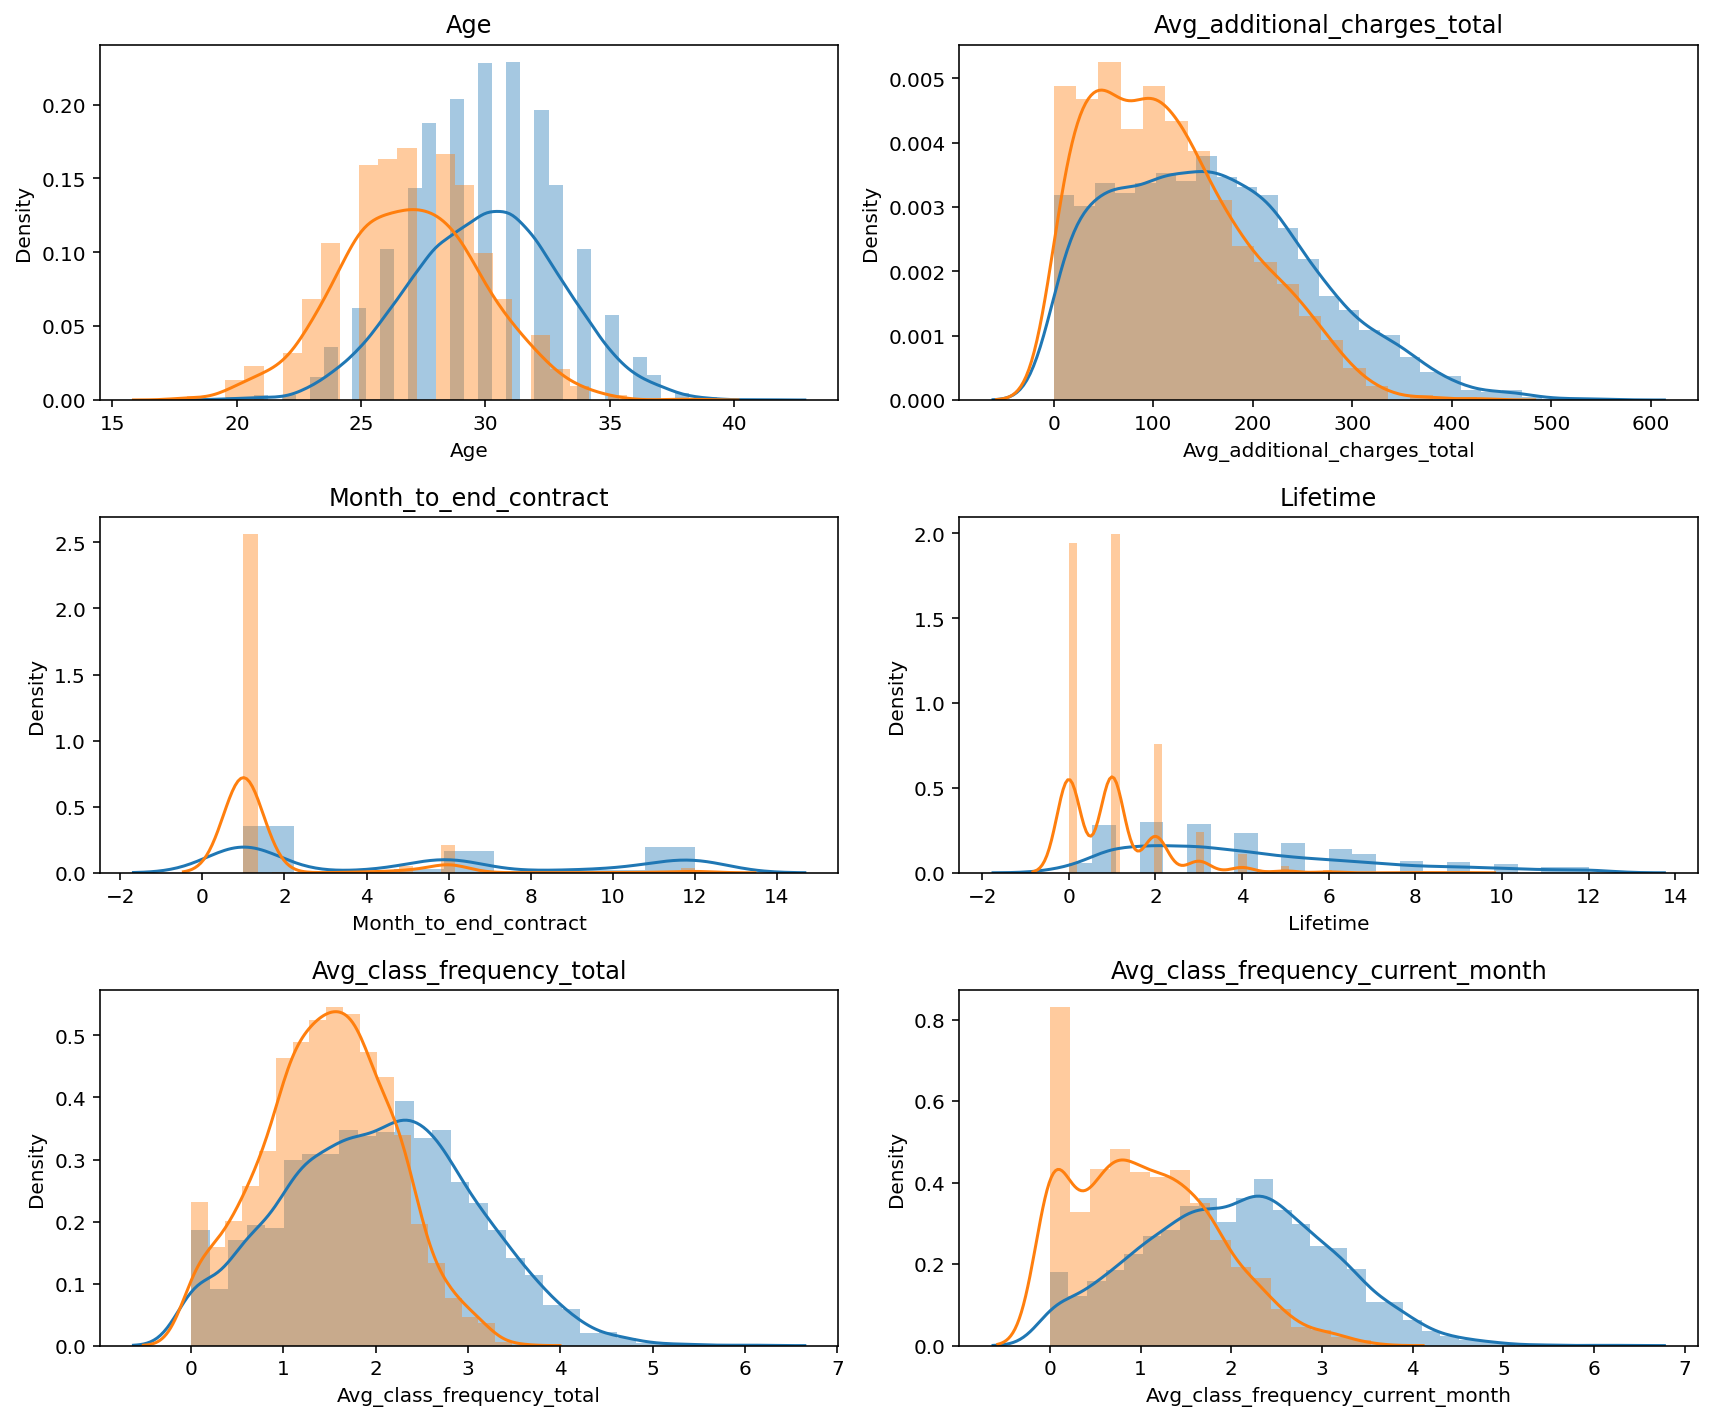

In [14]:
params = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract',\
          'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']
col_count, row_count = 2, 3

plt.figure(figsize=(12, 10))

for i, param in enumerate(params):
    for churn in df_1['Churn'].unique():
        current = df_1.query('Churn == @churn')
        sns.distplot(current[param], kde=True, 
                    ax = plt.subplot(row_count, col_count, i + 1))
    plt.title(param)
plt.tight_layout()    
plt.show()

Мы видим, что графики практически не изменились. Оставим изменения в силе.

## 2.3. Построение матрицы корреляции и тепловой карты

Теперь нам необходимо построить матрицу корреляции. Для этого предварительно отбросим столбец `'Churn'` и применем метод `'corr'`.

Также после этого отобразим матрицу корреляции на тепловой карте используя метод `'heatmap'`.

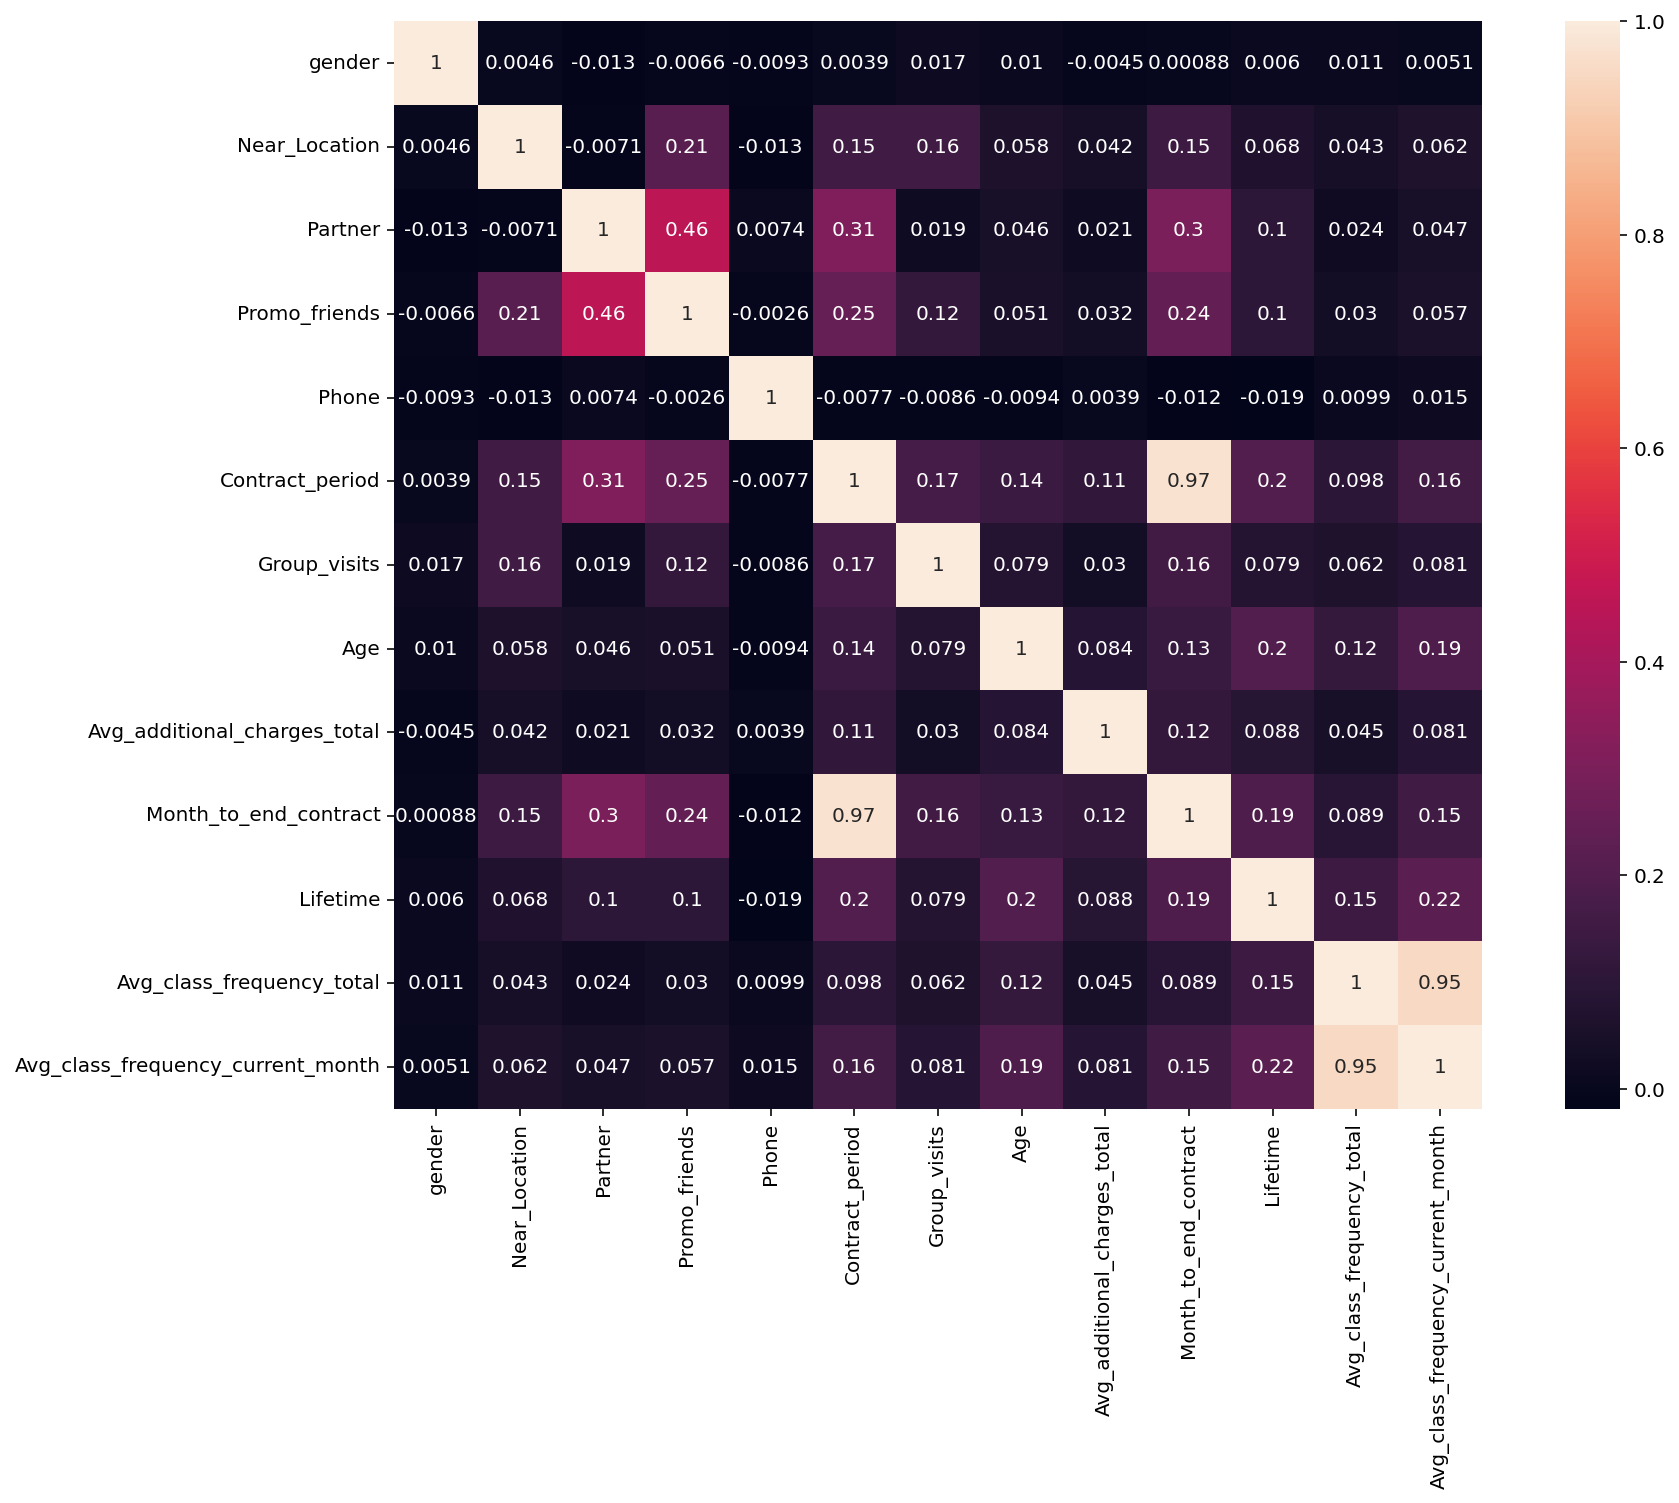

In [15]:
X = df_1.drop('Churn', axis=1)
cm = X.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, square=True)
plt.show()

На тепловой карте явно видно, что параметры продолжительности контракта ('Contract_period') и срок окончания контракта ('Month_to_end_contract'), а также параметры общего среднего посещения ('Avg_class_frequency_total') и среднего посещения за месяц ('Avg_class_frequency_current_month') сильно коррелируют между собой (показатель практически равен "1").

Также коррелируют между собой показатели сотрудник компании_партнера ('Partner') и участник акции "приведи друга" ('Promo_friends'), но эта корреляция не сильная, эти данные можно оставить для дальнейшего анализа.

Чтобы повысить эффективность будущих моделей прогнозирования удалим из данных сильно коррелирующие между собой показатели ('Avg_class_frequency_current_month', 'Month_to_end_contract').

In [16]:
X = X.drop(['Avg_class_frequency_current_month', 'Month_to_end_contract'], axis=1)
X.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884


# 3. Построение моделей прогнозирования оттока клиентов

Приступаем к построению моделей прогонозирования оттока клиентов. 

Мы будем строить модели по алгоритмам для  решения задачи бинарной классификации. для этого нам понадобятся следующие модели: Логистическая регрессия (`sklearn.linear_model.LogisticRegression()`), Дерево принятия решений (`sklearn.tree.DecisionTreeClassifier()`), Случайный лес (`sklearn.ensemble.RandomForestClassifier()`), Градиентный бустинг (`sklearn.ensemble.GradientBoostingClassifier()`)

Также перед построением моделей необходимо будет сделать стандартизацию данных. Для этого нам пригодится класс `StandardScaler()` в модуле `preprocessing `.

Наши модели мы будем оценивать с помощью следующих метрик: Доля правильных ответов (англ. accuracy), Точность (англ. precision) и полнота (англ. recall), F1_score.

Импортируем все необходимые библиотеки.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Еще раз посмоторим на соотношение количества оставшихся клиентов и тех, кто ушел в отток.

In [18]:
df_1['Churn'].value_counts()

0    2800
1    1061
Name: Churn, dtype: int64

Практически трехкратное превосхлдство тех, кто остался, над теми, кто ушел в отток.

Разделим наши данные на признаки (Х) и целевую переменную (y).

In [19]:
X.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884


In [20]:
y = df_1['Churn']

Готово!

Теперь нам необходимо разделить наши на обучающую и валидационную выборки. Разделять будем в соотношении 80:20.

Применим метод `train_test_split`. Чтобы наши результаты были постоянны применим параметр `random_state`

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Проведем стандартизацию данных обучающей выборки и применим готовую стандартизацию к тестовой выборке.

In [22]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
# обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(
    X_train
)
# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

Задаем список моделей. Чтобы наши результаты были постоянны применим параметр `random_state`

In [23]:
models = [
    LogisticRegression(solver='liblinear', random_state=0),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0)
]

Напишем функцию, которая будет принимать на вход модель из списка и выводить необходимые нам метрики.

In [24]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = i
    model.fit(X_train_st, y_train)
    y_pred = model.predict(X_test_st)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('Accuracy score:{:.2f} Precision score:{:.2f} Recall score:{:.2f} F1 score:{:.2f} '\
          .format(accuracy, precision, recall, f1))

Теперь напишем цикл, который выведет указанные метрики для сравнения эффективности моделей.

In [25]:
for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)
    print()

LogisticRegression(random_state=0, solver='liblinear')
Accuracy score:0.90 Precision score:0.82 Recall score:0.83 F1 score:0.82 

DecisionTreeClassifier(random_state=0)
Accuracy score:0.83 Precision score:0.69 Recall score:0.68 F1 score:0.69 

RandomForestClassifier(random_state=0)
Accuracy score:0.88 Precision score:0.80 Recall score:0.76 F1 score:0.78 

GradientBoostingClassifier(random_state=0)
Accuracy score:0.90 Precision score:0.82 Recall score:0.79 F1 score:0.81 



По итогам проведенных симуляций заключаем следующее:

- **Наиболее точные прогнозы дают модели Градиентный бустинг `GradientBoostingClassifier` и Логистическая регрессия `LogisticRegression`.**

- **Приемлимые резудьтаты показала модель Дерево принятия решений `RandomForestClassifier`.**

- **Худшие рещультаты у модели Случайный лес `DecisionTreeClassifier`.**

Исходя из полученных результатов метрик для прогнозирования оттока клиентов фитнесс_клубов **мы предлагаем использовать модель Логистической регрессии `LogisticRegression`**, так как по всем показателям метрик она показывает наилучшие результаты.

# 4. Кластеризация клиентов

Дополнительно проведем кластеризацию клиентов. 

Кластеризацию будем проводить двумя различными методами: 

- `KMeans`;

- Агломеративная иерархическая кластеризация.

Импортируем необходимые библиотеки.

In [26]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

После этого выполним стандартизацию и передадим получившуюся стандартизированную таблицу в качестве параметра функции `linkage()`. Чтобы диаграмма получилась показательной,  передадим параметру `method` значение `'ward'`.

In [27]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

linked = linkage(x_sc, method = 'ward')

Визуализируем таблицу связей между объектами на дандрограмме.

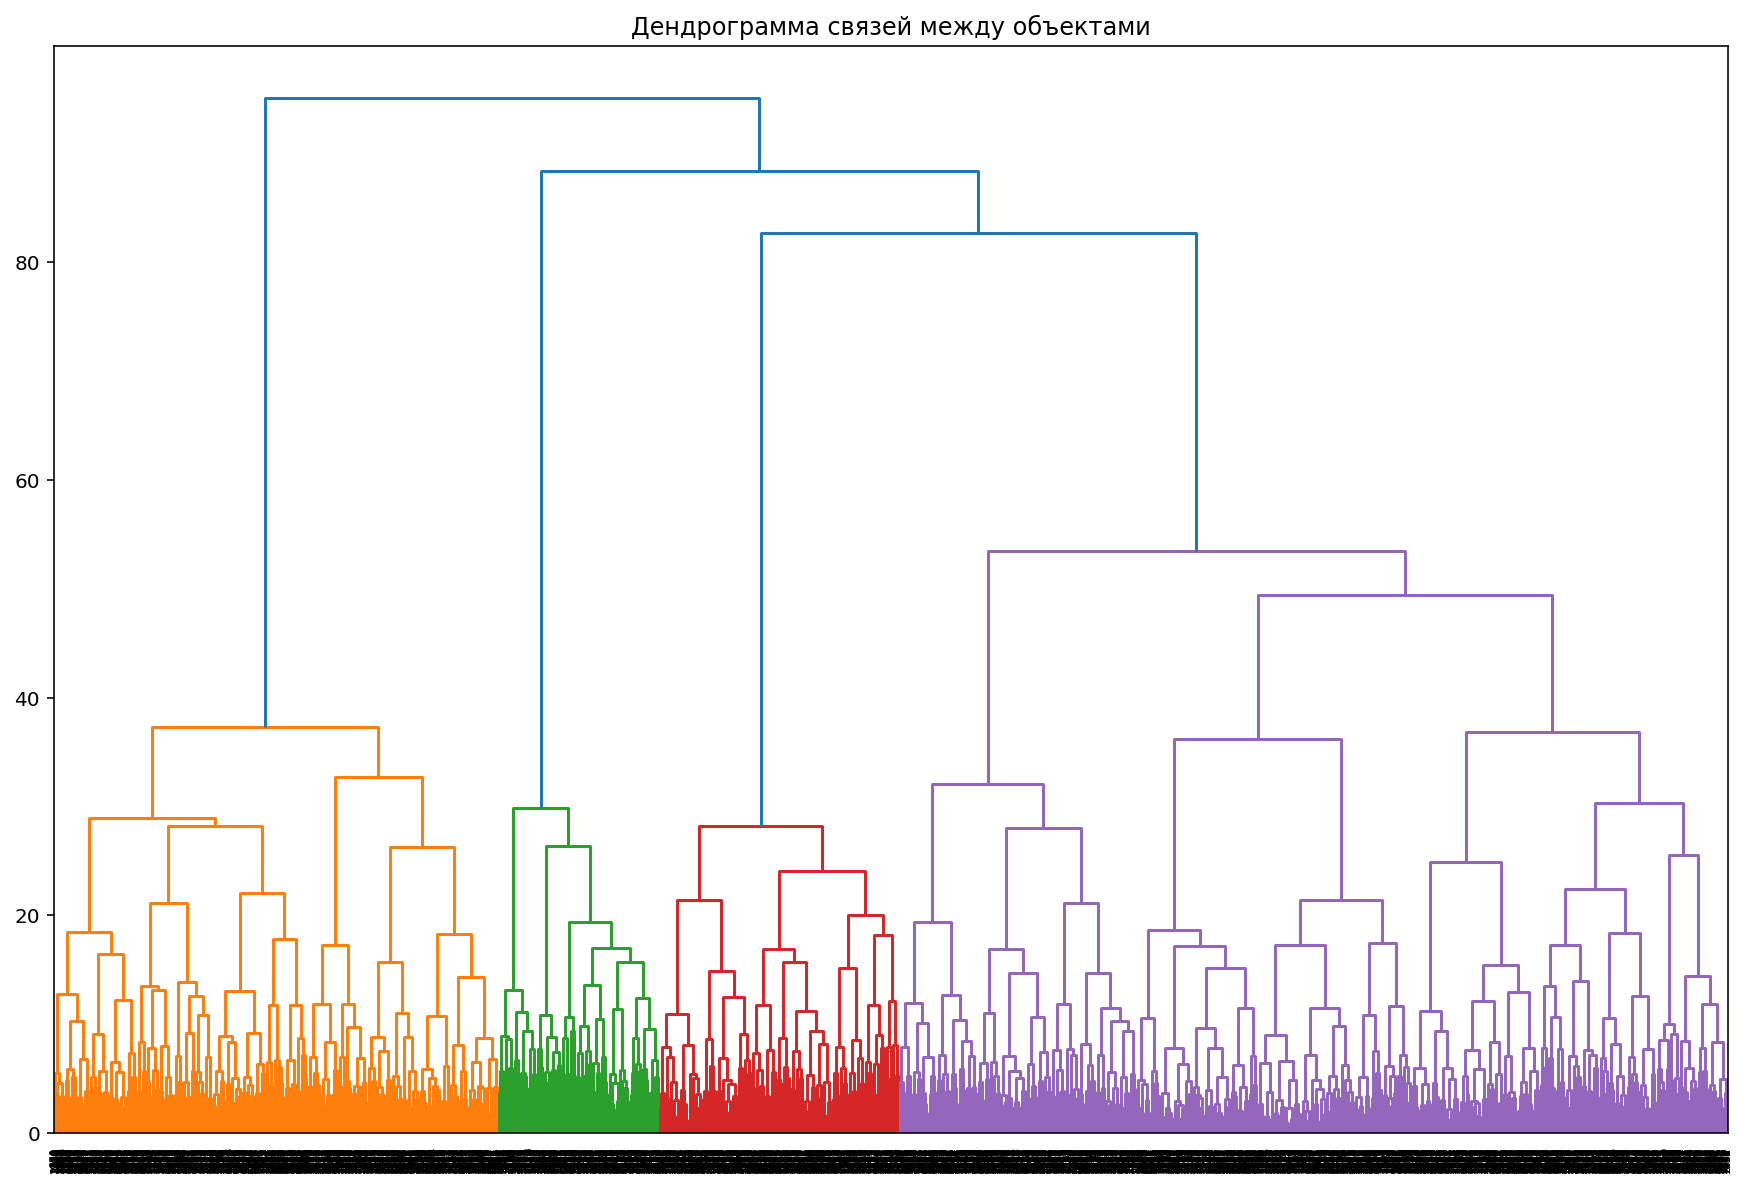

In [28]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма связей между объектами')
plt.show() 

Модель предлагает разбить наших клиентов на 4 группы по предоставленным признакам.

Теперь выполним кластеризацию методом `KMeans` для которого количество кластеров примем равным n=5.

Применяем алгоритм к данным и формируем вектор кластеров.

In [29]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(x_sc)

Посмотрим на средние значения признаков для кластеров.

In [30]:
X['cluster_km'] = labels
clusters = X.groupby(['cluster_km']).mean()
clusters

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total
cluster_km,,,,,,,,,,,
0,0.551919,0.996614,0.255079,0.045147,1.0,5.077878,0.530474,30.871332,185.319964,4.863431,2.410604
1,0.500000,0.000000,0.492647,0.075368,1.0,2.928309,0.229779,28.670956,137.313376,2.696691,1.764439
2,0.495652,1.000000,0.233816,0.092754,1.0,2.065700,0.287923,27.587440,115.792435,1.638647,1.450031
3,0.483902,0.994146,0.949268,0.878049,1.0,7.755122,0.520976,29.511220,149.275743,3.790244,1.915908
4,0.522911,0.857143,0.477089,0.312668,0.0,4.754717,0.423181,29.258760,145.351973,3.433962,1.847038


Мы видим, что:

- пол, возраст равномерно распределился по кластерам;

- в кластере "1" собраны клиенты, не проживающие близко к фитнесс-клубу;

- в кластере "4" собраны клиенты не указавшие номер телефона при регистрации;

- в кластере "3" в основном собраны клиенты, сотрудники компаний-партнеров, и клиенты, участники акции "приведидруга".

- в кластерах "1" и "2" собраны в основном клиенты с короткими сроками контрактов и малым  сроком их окончания.

Отобразим взаимосвязь признаков между собой по 5 кластерам.

Для этого применим два способа:

- построим методом `'pairplot'` библиотеки `Seaborn` попарные диаграммы рассеяния;

- отрисуем графики для попарных сочетаний признаков с разметкой по кластерам.

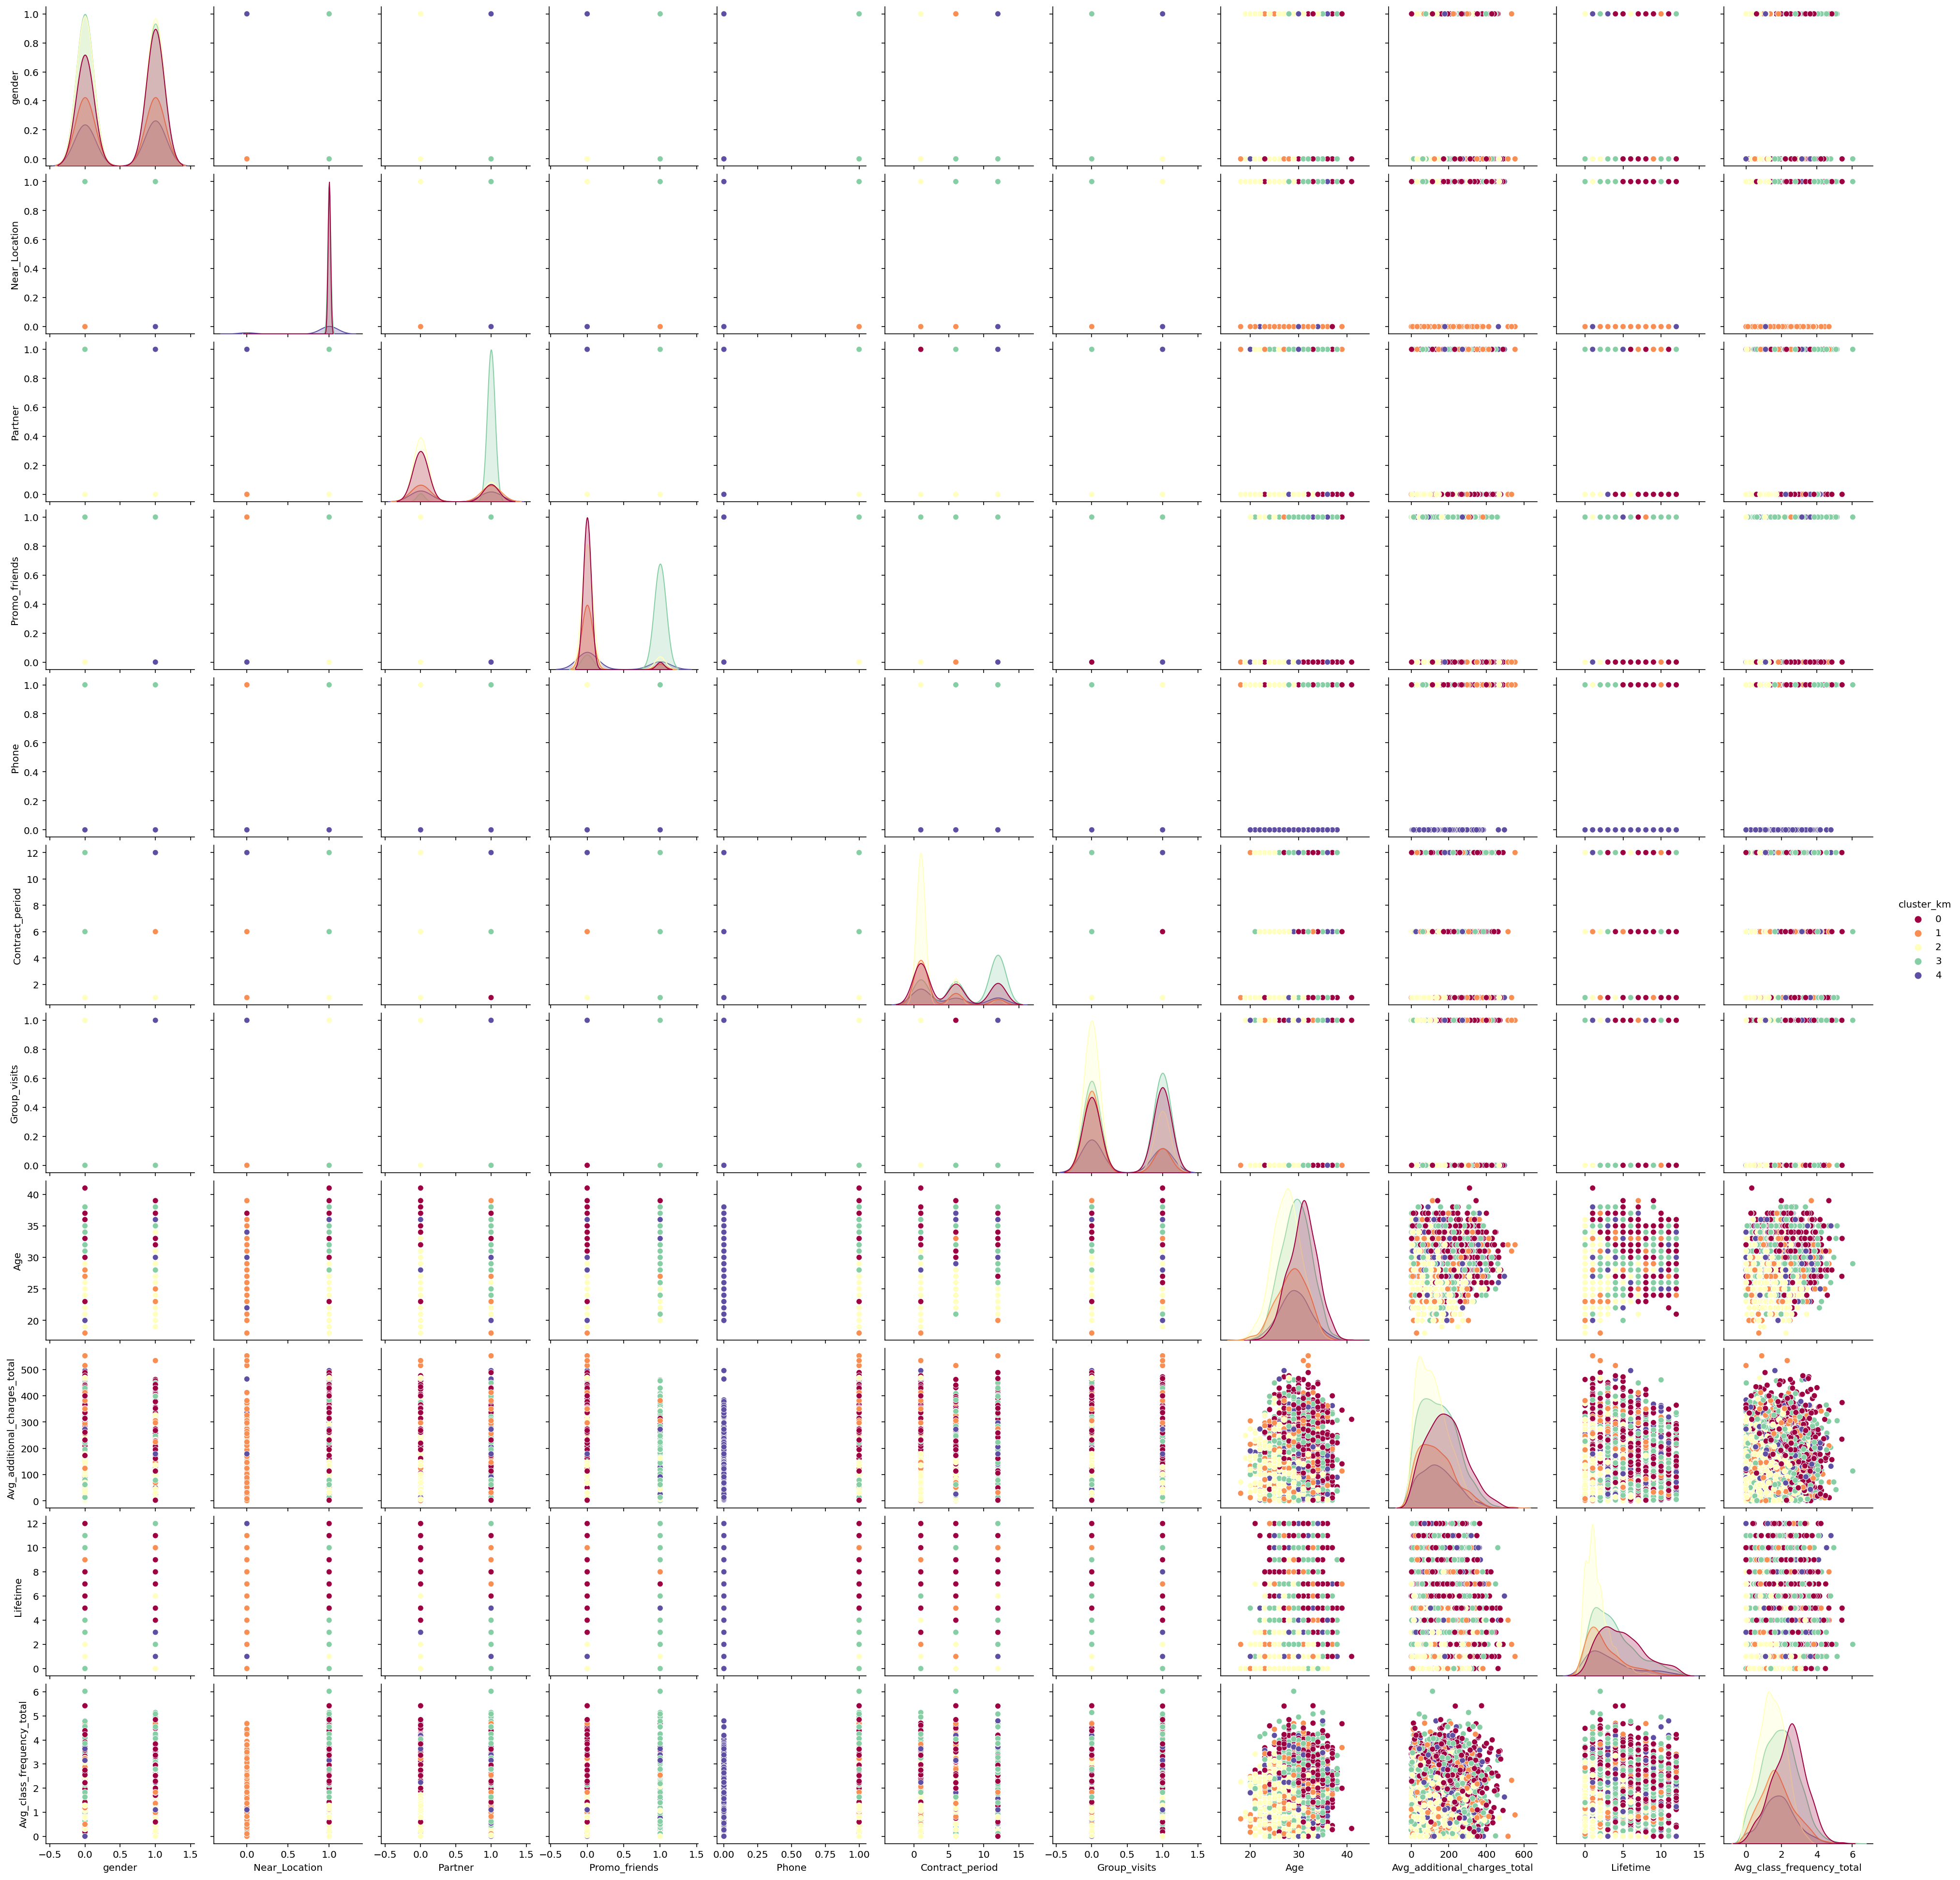

In [31]:
sns.pairplot(X, hue='cluster_km', palette='Spectral')
plt.show()

Также отобразим на графиках распределение признаков по кластерам:

- для дискретных величин методом `sns.countplot`;

- для непрерывных величин методами `sns.distplot` и `sns.boxplot`.

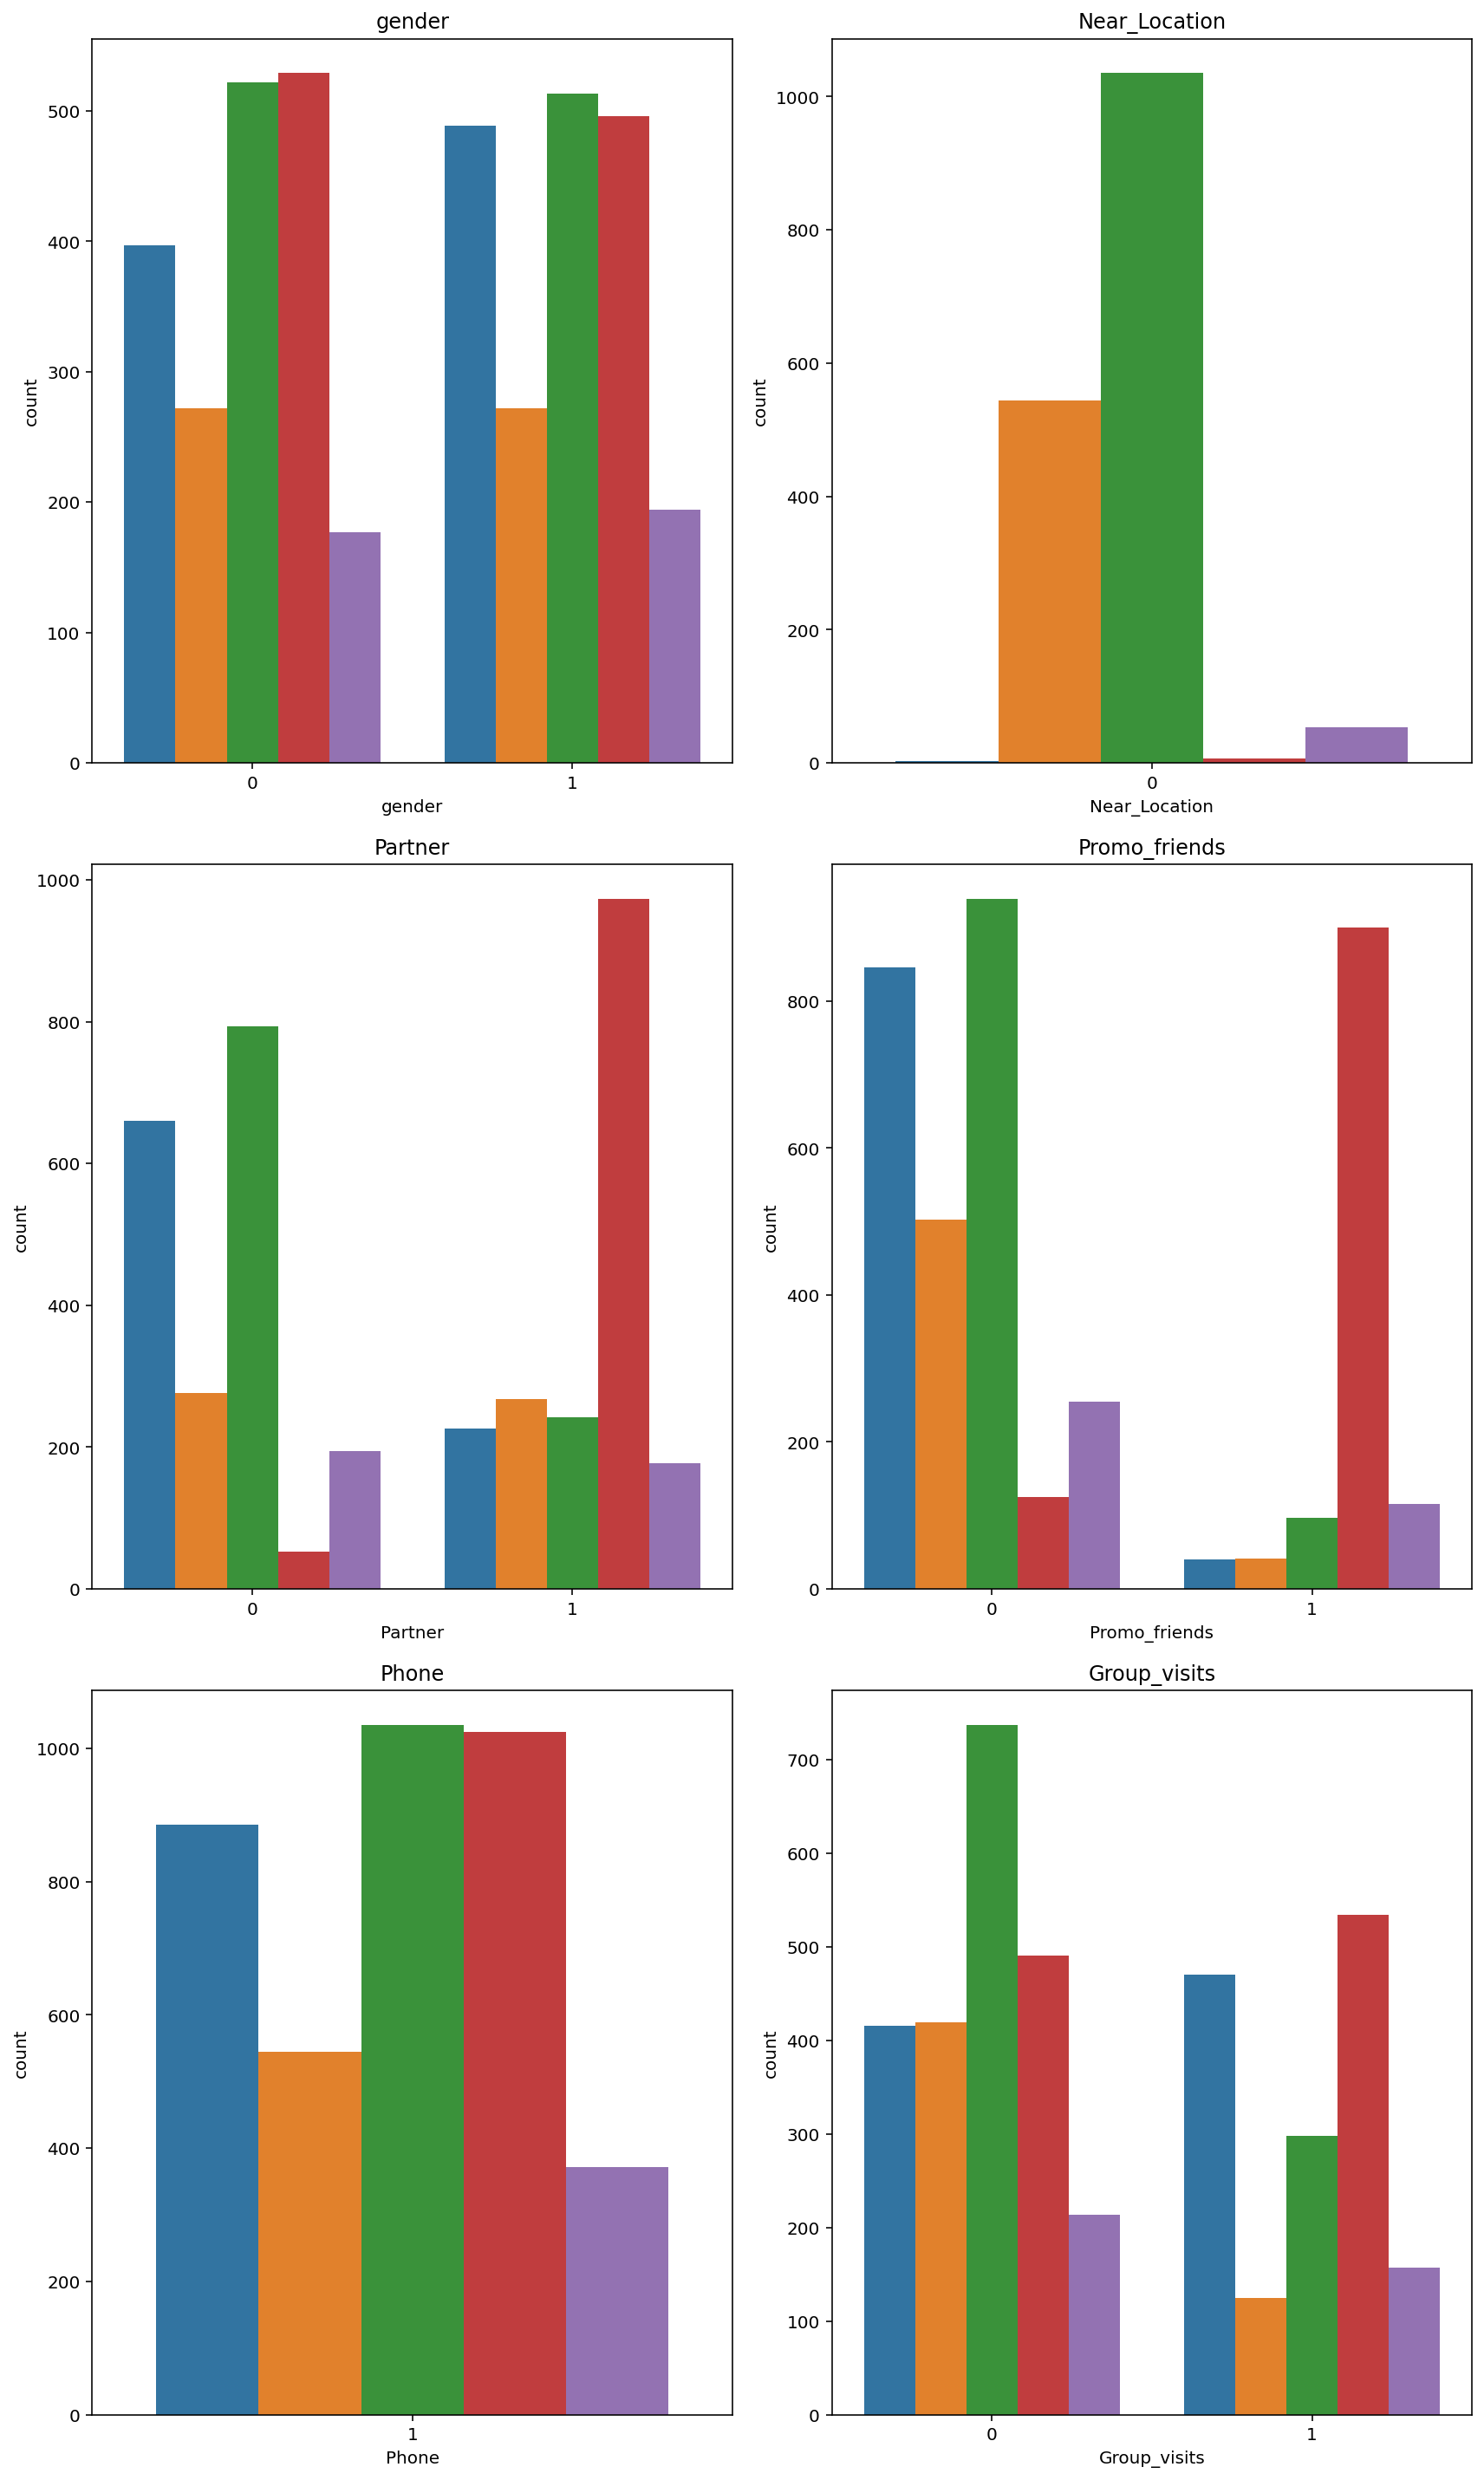

In [32]:
params = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']
col_count, row_count = 2, 3

plt.figure(figsize=(12, 20))

for i, param in enumerate(params):
    for cluster in X['cluster_km'].unique():
        current = X.query('cluster_km == @cluster')
        sns.countplot(current[param], hue = X['cluster_km'], 
                    ax = plt.subplot(row_count, col_count, i + 1))
    plt.legend([],[], frameon=False)
    plt.title(param)
plt.tight_layout()    
plt.show()

In [ ]:
params = ['Age', 'Avg_additional_charges_total',\
          'Lifetime', 'Avg_class_frequency_total']
col_count, row_count = 2, 2

plt.figure(figsize=(12, 10))

for i, param in enumerate(params):
    for cluster in X['cluster_km'].unique():
        current = X.query('cluster_km == @cluster')
        sns.distplot(current[param], kde=True, 
        ax = plt.subplot(row_count, col_count, i + 1))
    plt.title(param)
plt.tight_layout()    
plt.show()

In [ ]:
params = ['Age', 'Avg_additional_charges_total',\
          'Lifetime', 'Avg_class_frequency_total']
col_count, row_count = 2, 2

plt.figure(figsize=(12, 10))

for i, param in enumerate(params):
    for cluster in X['cluster_km'].unique():
        current = X.query('cluster_km == @cluster')
        sns.boxplot(x=X['cluster_km'], y=current[param], data=X,
        ax = plt.subplot(row_count, col_count, i + 1))
    plt.title(param)
plt.tight_layout()    
plt.show()

Здесь мы видим визуальное подтверждение ранее сделланых выводов:

- **пол, возраст равномерно распределился по кластерам**;

- **в кластере "1" собраны клиенты, не проживающие близко к фитнесс-клубу**;

- **в кластере "4" собраны клиенты не указавшие номер телефона при регистрации**;

- **в кластере "3" в основном собраны клиенты, сотрудники компаний-партнеров, и клиенты, участники акции "приведидруга"**.

- **в кластерах "1" и "2" собраны в основном клиенты с короткими сроками контрактов и малым  сроком их окончания**.

Теперь для каждого кластера нам необходимо посчитать долю оттока. 

Для этого добавим в датафрейм столбец с кластерами.

In [ ]:
df_1['clusters'] = labels

И посчитаем по кластерам  количество клиентов, количество клиентов, ушедших в отток, долю от количетва клиентов в кластере.

In [ ]:
a = df_1.groupby('clusters')['Churn'].agg({'count', 'sum'}).rename(columns = {'sum':'Sum', 'count':'Count'})
a['%'] = (a['Sum']/a['Count']*100).round()
a.sort_values('%', ascending=False)

Проверим, совпадает ли количество клиентов в данных.

In [ ]:
print('Количество клиентов в исходных данных:')
print(df_1['Churn'].count())
print('Количество клиентов в кластерах:')
print(a['Count'].sum())

# Выводы

В ходе нашего анализа мы создали и оценили модели прогнозирования оттока клиентов: **наилучшие результаты дают модели Градиентный бустинг `GradientBoostingClassifier` и Логистическая регрессия `LogisticRegression`.

Также мы провели кластеризацию клиентов и выявили закономерности оттока клиентов по кластерам.

**Наилучшие показатели удержания клиентов в кластерах `0` и `3` (всего `2%` и `11%` соответственно), а наихудшие в кластере `2` (`58%`, более половины клиентов попаи в отток).**

Посмотрим детально какими признаками обладают клиенты в выделенных кластерах и на что следует обратить внимание.

Клиенты кластеров `0` и `3` с хорошим процентом удержания: 
- проживают либо работают рядом с фитнесс-клубом;

- имеют длинные контракт на посещение (5-7 месяцев);

- являются участниками акции "приведи друга";

- часто посещают групповые занятия;

- пользуются другими услугами фитнесс-клубов: кафе, спорттовары, косметический и массажный салон;

- имеют более высокий показатель средней частоты посещений.

В то же время клиенты из кластера `2` с высоким процентом оттока характеризуются:

- близким к фитнесс-клубу проживанием или метом работы;

- не являются участниками акции "приведи друга";

- имеют короткий срок действия абонементов;

- не пользуются дополнительными услугами фитнесс-клубов;

- имеют невысокий показатель средней частоты посещений.

Для улучшения количества клиентов, частоты посещения ими фитнесс-клубов, а также уменьшения количества ушедших в отток клиентов нами видятся следующие меры:

- **внедрение комплексных абонементов с включенными дополнительными услугами фитнесс-клубов;**

- **замена краткосрочных абонементов на продолжительные  с дополнительными условиями периода-заморозки действия абонемента либо его возврата;**

- **внедрение дополнительных программ для компаний-партнеров на проведение групповых занятий для их сотрудников;**

- **проведение открытых мастер-классов и групповых занятий для жителей района;**

- **внедрение дополнительных услуг для клиентов-"долгожителей";**

- **развитие и улучшение программы "приведи друга".**